In [6]:
import pandas as pd

In [3]:
data = pd.read_csv('./datasets/sample.csv', names=["sentence"])
data

,sentence
0,The future king is the prince
1,Daughter is the princess
2,Son is the prince
3,Only a man can be a king
4,Only a woman can be a queen
5,The princess will be a queen
6,Queen and king rule the realm
7,The prince is a strong man
8,The princess is a beautiful woman
9,The royal family is the king and queen and the...


In [33]:
texts = [x for x in data['sentence']]
texts

['The future king is the prince',
 'Daughter is the princess',
 'Son is the prince',
 'Only a man can be a king',
 'Only a woman can be a queen',
 'The princess will be a queen',
 'Queen and king rule the realm',
 'The prince is a strong man',
 'The princess is a beautiful woman',
 'The royal family is the king and queen and their children',
 'Prince is only a boy now',
 'A boy will be a man']

In [46]:
import re
from nltk.corpus import stopwords
# clean the data


for i in range(len(texts)):
    """clean/pre-process texts"""
    text = texts[i]
    # # remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # # convert to lower case
    text = text.lower()
    # # remove stopwords
    text = text.split()
    text = [t for t in text if t not in set(stopwords.words('english'))]
    text = ' '.join(text)
    texts[i] = text

texts

['future king prince',
 'daughter princess',
 'son prince',
 'man king',
 'woman queen',
 'princess queen',
 'queen king rule realm',
 'prince strong man',
 'princess beautiful woman',
 'royal family king queen children',
 'prince boy',
 'boy man']

In [56]:
# create the window for focus and context
window=2 

word_list = [] # to store focus and context
all_text = []

for text in texts:
    split_text = text.split()
    for i, word in enumerate(split_text):
        all_text.append(word)
        for w in range(window):
            if i + w < len(split_text) -1:
                word_list.append([word] + [split_text[i+w+1]])
            if i - w - 1 >= 0:
                word_list.append([word] + [split_text[i-w-1]])

print(word_list[:5])
print(all_text[:5])


[['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], ['prince', 'king']]
['future', 'king', 'prince', 'daughter', 'princess']


In [62]:
"""
After the initial creation of the data points, 
we need to assign a unique integer (often called index) to each unique word 
of our vocabulary. This will be used further on when creating one-hot encoded 
vectors.
"""
unique_words_dict = {}
unique_words = list(set(all_text))
unique_words.sort()

for i, word in enumerate(unique_words):
    unique_words_dict[word] = i

unique_words_dict

{'beautiful': 0,
 'boy': 1,
 'children': 2,
 'daughter': 3,
 'family': 4,
 'future': 5,
 'king': 6,
 'man': 7,
 'prince': 8,
 'princess': 9,
 'queen': 10,
 'realm': 11,
 'royal': 12,
 'rule': 13,
 'son': 14,
 'strong': 15,
 'woman': 16}

In [73]:
import numpy as np
"""One Hot Encoding"""
# defining number of features (unique words)
n_words = len(unique_words_dict)

# getting all unique words
words = list(unique_words_dict)

# creating X and Y matricies
X, y = [], []

for i, wl in enumerate(word_list):
    # get indicies
    focus_index = unique_words_dict[wl[0]]
    context_index = unique_words_dict[wl[1]]

    # creating placeholders
    X_row = np.zeros(n_words)
    y_row = np.zeros(n_words)

    # One hot encode
    X_row[focus_index] = 1
    y_row[context_index] = 1

    # append to main matrices
    X.append(X_row)
    y.append(y_row)

X = np.array(X)
y = np.array(y)

X[:4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [72]:
y[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [78]:
"""Convert one-hot encoded to featurised vector for NN training"""

from keras.models import Sequential
from keras.layers import Dense

# define size of embeddings
embedded_size = 2

# setup neural network
model = Sequential()
model.add(Dense(units=embedded_size, activation="linear"))
model.add(Dense(units=y.shape[1], activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x=X, y=y, batch_size=256, epochs=100)

In [82]:
# obtain weights from neural networks
weights = model.get_weights()[0]
weights

array([[ 0.3867862 ,  0.13325857],
       [ 0.31450433, -0.06316046],
       [ 0.5102083 , -0.36884046],
       [ 0.15072194,  0.18422046],
       [ 0.30279258,  0.03165843],
       [ 0.58097774, -0.01106695],
       [ 0.54702294,  0.41340837],
       [ 0.32688454,  0.3145537 ],
       [ 0.37253207, -0.44919333],
       [ 0.41919175, -0.12614997],
       [-0.03410402,  0.25853628],
       [ 0.3531556 , -0.5699238 ],
       [ 0.17911632,  0.29212967],
       [-0.0651465 , -0.47774622],
       [ 0.49483198, -0.36526406],
       [-0.3676314 , -0.03043018],
       [ 0.08777016,  0.00390148]], dtype=float32)

In [84]:
embedding_dict = {}
for word in words:
    embedding_dict.update({word: weights[unique_words_dict.get(word)]})

embedding_dict

{'beautiful': array([0.3867862 , 0.13325857], dtype=float32),
 'boy': array([ 0.31450433, -0.06316046], dtype=float32),
 'children': array([ 0.5102083 , -0.36884046], dtype=float32),
 'daughter': array([0.15072194, 0.18422046], dtype=float32),
 'family': array([0.30279258, 0.03165843], dtype=float32),
 'future': array([ 0.58097774, -0.01106695], dtype=float32),
 'king': array([0.54702294, 0.41340837], dtype=float32),
 'man': array([0.32688454, 0.3145537 ], dtype=float32),
 'prince': array([ 0.37253207, -0.44919333], dtype=float32),
 'princess': array([ 0.41919175, -0.12614997], dtype=float32),
 'queen': array([-0.03410402,  0.25853628], dtype=float32),
 'realm': array([ 0.3531556, -0.5699238], dtype=float32),
 'royal': array([0.17911632, 0.29212967], dtype=float32),
 'rule': array([-0.0651465 , -0.47774622], dtype=float32),
 'son': array([ 0.49483198, -0.36526406], dtype=float32),
 'strong': array([-0.3676314 , -0.03043018], dtype=float32),
 'woman': array([0.08777016, 0.00390148], dty

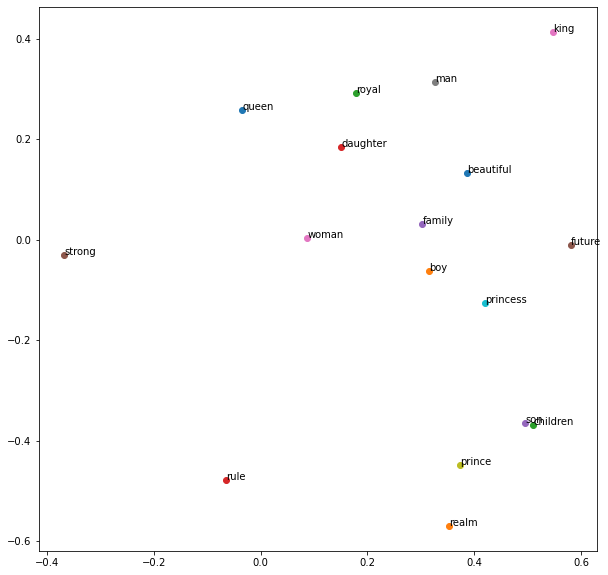

In [85]:
# after getting weights we can plot it to see feature results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for word in list(unique_words_dict):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, [coord[0], coord[1]])